# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [3]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
temp.dtypes

#City data. it is the city name, the state of that city and then the temperature. 

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [5]:
temp[temp.State == 'New York']

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [6]:
temp.Temperature[temp.State == 'New York'].mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [7]:
temp[temp.Temperature > 15].drop(["Temperature"], axis=1)

,City,State
0,NYC,New York
3,Hartford,Connecticut
5,Treton,New Jersey
6,Newark,New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [8]:
temp[temp.Temperature > 15].drop(["State","Temperature"], axis=1)

,City
0,NYC
3,Hartford
5,Treton
6,Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [9]:
temp[(temp.Temperature > 15) & (temp.Temperature <20)].drop(["State","Temperature"], axis=1)

,City
0,NYC
3,Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [10]:
temp.groupby(["State"]).mean()

,Temperature
State,
Connecticut,15.833333
New Jersey,21.111111
New York,10.740741


In [11]:
temp.groupby(["State"]).std()

,Temperature
State,
Connecticut,1.964186
New Jersey,1.571348
New York,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [12]:
employee = pd.read_csv('employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [13]:
employee.dtypes
#seems like we are having characteristics of the employees, with name, working department, highest level of education, 
#also there is the gender, title of their employement, years in the organization and the salary (000)

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

In [14]:
employee.head(5)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

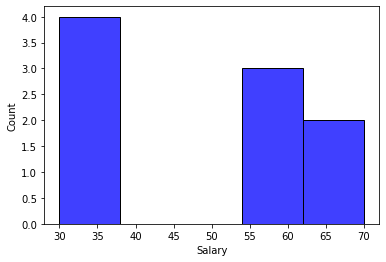

In [17]:
sns.histplot(
        data = employee,
        x = 'Salary',
        color = 'blue');

#nobody is making between 37 and 52k

#### What's the average salary in this company?

In [18]:
employee["Salary"].mean()

48.888888888888886

#### What's the highest salary?

In [19]:
employee["Salary"].max()

70

#### What's the lowest salary?

In [20]:
employee["Salary"].min()

30

#### Who are the employees with the lowest salary?

In [21]:
employee[employee.Salary == employee["Salary"].min()]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [22]:
employee[employee.Name == 'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [23]:
employee[employee.Name == 'David'].Salary

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [24]:
employee[employee.Title == 'associate']

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [25]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [26]:
# your answer here- 2nd method
employee.iloc[[0,1,2]]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [27]:
employee[(employee.Title == 'associate')&(employee.Salary>55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [28]:
employee.groupby(["Years"]).mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [29]:
employee.groupby(["Title"]).mean()

,Years,Salary
Title,,
VP,8.00,70.000000
analyst,2.25,32.500000
associate,4.00,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

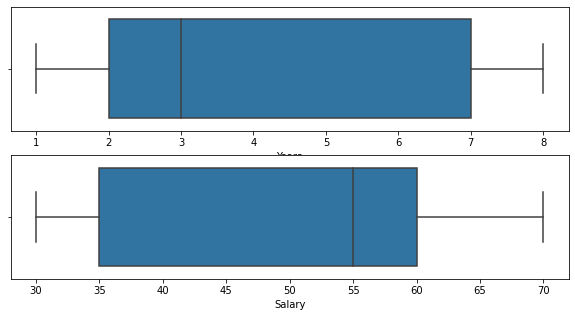

In [99]:
df_num = employee.select_dtypes(include = np.number)
fig, ax = plt.subplots(2, 1, figsize=(10,5))

for i in range(len(df_num.columns)):
    sns.boxplot(x=df_num.columns[i], data=df_num, ax=ax[i])
plt.show()

In [31]:
print(np.round(employee.quantile(0.25), 2))

Years      2.0
Salary    35.0
Name: 0.25, dtype: float64


In [33]:
print(np.round(employee.quantile(0.75), 2))

Years      7.0
Salary    60.0
Name: 0.75, dtype: float64


#### Is the mean salary per gender different?

In [100]:
employee.groupby(["Gender"]).mean()

,Years,Salary
Gender,,
F,4.0,47.5
M,4.2,50.0


In [ ]:
#it is different, but also the years of maturity are. in average, males make 50k while females 47.5k (very sad)

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [50]:
employee.groupby(["Department"]).mean()

,Years,Salary
Department,,
HR,4.666667,45.00
IT,4.500000,48.75
Sales,2.500000,55.00


In [51]:
employee.groupby(["Department"]).min()

,Name,Education,Gender,Title,Years,Salary
Department,,,,,,
HR,Ana,Bachelor,F,VP,2,30
IT,Carlos,Bachelor,F,VP,1,30
Sales,Eva,Bachelor,F,associate,2,55


In [52]:
employee.groupby(["Department"]).max()

,Name,Education,Gender,Title,Years,Salary
Department,,,,,,
HR,Sonia,Master,M,analyst,8,70
IT,Pedro,Phd,M,associate,8,70
Sales,Samuel,Master,M,associate,3,55


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [55]:
orders = pd.read_csv('orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [56]:
orders.head(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [57]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,397924.0,278465.221859,152771.368303,0.0,148333.75,284907.50,410079.25,541908.00
InvoiceNo,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


####  What is the average Purchase Price?

AV.Under **mean** and in the **unit price** row it is **3.11**

#### What were the highest and lowest purchase prices? 

In [58]:
orders.UnitPrice.min()

0.0

In [59]:
orders.UnitPrice.max()

8142.75

#### Select all the customers we have in Spain

In [72]:
sp = pd.DataFrame(orders[orders.Country == 'Spain'].CustomerID.unique())
sp

,0
0,12557
1,17097
2,12540
3,12551
4,12484
5,12539
6,12510
7,12421
8,12502
9,12462


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [73]:
sp.shape[0]

30

#### Select all the customers who have bought more than 50 items ?

In [76]:
plus50 = pd.DataFrame(orders[orders.Quantity >= 50].CustomerID.unique())
plus50

,0
0,13748
1,15291
2,14688
3,16098
4,16029
...,...
1363,14032
1364,15520
1365,15877
1366,13298


#### Select orders from Spain that are above 50 items

In [78]:
sp_plus50 = pd.DataFrame(orders[(orders.Country == 'Spain') & (orders.Quantity >= 50)].CustomerID.unique())
sp_plus50

,0
0,12557
1,12507
2,12484
3,12546
4,12454
5,12596
6,12597


#### Select all free orders

In [80]:
free = orders[orders.UnitPrice == 0.0]
free

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [83]:
lunch = orders.loc[orders.iloc[:,7].str.contains(r'(lunch)')]
lunch

C:\Users\anton\AppData\Local\Temp/ipykernel_12476/873135432.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  lunch = orders.loc[orders.iloc[:,7].str.contains(r'(lunch)')]


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
35,35,536370,22629,2010,12,3,8,spaceboy lunch box,24,2010-12-01 08:45:00,1.95,12583,France,46.80
36,36,536370,22659,2010,12,3,8,lunch box i love london,24,2010-12-01 08:45:00,1.95,12583,France,46.80
37,37,536370,22631,2010,12,3,8,circus parade lunch box,24,2010-12-01 08:45:00,1.95,12583,France,46.80
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
94,94,536378,21559,2010,12,3,9,strawberry lunch box with cutlery,6,2010-12-01 09:37:00,2.55,14688,United Kingdom,15.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50
397880,541865,581583,20725,2011,12,5,12,lunch bag red retrospot,40,2011-12-09 12:23:00,1.45,13777,United Kingdom,58.00
397909,541894,581587,22631,2011,12,5,12,circus parade lunch box,12,2011-12-09 12:50:00,1.95,12680,France,23.40


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [84]:
lunch[lunch.year == 2011]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26440,42779,540021,22630,2011,1,2,12,dolly girl lunch box,1,2011-01-04 12:51:00,1.95,17841,United Kingdom,1.95
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50
397880,541865,581583,20725,2011,12,5,12,lunch bag red retrospot,40,2011-12-09 12:23:00,1.45,13777,United Kingdom,58.00
397909,541894,581587,22631,2011,12,5,12,circus parade lunch box,12,2011-12-09 12:50:00,1.95,12680,France,23.40


#### Show the frequency distribution of the amount spent in Spain.

#### Select all orders made in the month of August

In [85]:
august = orders[orders.month == 8]
august

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [86]:
orders[orders.month == 8].groupby(["Country"]).count().InvoiceNo

Country
Australia            107
Austria               88
Belgium              194
Canada                 5
Channel Islands      140
Denmark               16
EIRE                 593
Finland               61
France               569
Germany              795
Iceland               22
Israel               171
Italy                 95
Malta                 55
Netherlands          280
Norway                77
Poland                17
Portugal              41
Spain                252
Sweden                40
Switzerland          267
United Kingdom     23105
Unspecified           23
Name: InvoiceNo, dtype: int64

#### What's the  average amount of money spent by country

In [87]:
orders.groupby(["Country"]).mean().amount_spent

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [93]:
exp = orders.groupby(["Description"]).max().sort_values(by=['UnitPrice'], ascending=False)
exp.head(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
Description,,,,,,,,,,,,,
postage,541768,581578,POST,2011,12,7,19,21,2011-12-09 12:16:00,8142.75,17935,United Kingdom,8142.75
manual,538321,581405,M,2011,12,7,20,1600,2011-12-08 13:50:00,4161.06,18283,United Kingdom,4161.06
dotcom postage,528082,580727,DOT,2011,12,5,17,1,2011-12-05 17:17:00,1599.26,14096,United Kingdom,1599.26
picnic basket wicker 60 pieces,222682,556446,22502,2011,6,5,15,60,2011-06-10 15:33:00,649.50,15098,United Kingdom,38970.00
vintage blue kitchen cabinet,393465,570827,22656,2011,12,7,17,2,2011-10-12 13:14:00,295.00,17690,United Kingdom,295.00


In [ ]:
#most expensive is postage with 8142

#### What was the average amount spent per year ?

In [94]:
orders.groupby(["year"]).mean().amount_spent

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64